In [1]:
# Initialize NumerAPI - the official Python API client for Numerai
from numerapi import NumerAPI
napi = NumerAPI()

# list the datasets and available versions
all_datasets = napi.list_datasets()
dataset_versions = list(set(d.split('/')[0] for d in all_datasets))
print("Available versions:\n", dataset_versions)

# Set data version to one of the latest datasets
DATA_VERSION = "v5.1"

# Print all files available for download for our version
current_version_files = [f for f in all_datasets if f.startswith(DATA_VERSION)]
print("Available", DATA_VERSION, "files:\n", current_version_files)

Available versions:
 ['v5.0', 'v5.1']
Available v5.1 files:
 ['v5.1/features.json', 'v5.1/live.parquet', 'v5.1/live_benchmark_models.parquet', 'v5.1/live_example_preds.csv', 'v5.1/live_example_preds.parquet', 'v5.1/meta_model.parquet', 'v5.1/train.parquet', 'v5.1/train_benchmark_models.parquet', 'v5.1/validation.parquet', 'v5.1/validation_benchmark_models.parquet', 'v5.1/validation_example_preds.csv', 'v5.1/validation_example_preds.parquet']


In [2]:
import json

# download the feature metadata file
# napi.download_dataset(f"{DATA_VERSION}/features.json")

# read the metadata and display
feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))

feature_sets 18
targets 37


In [3]:
feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
  print(feature_set, len(feature_sets[feature_set]))

small 42
medium 740
all 2562


Dataset all contains all features => We will focus on it exclusively

In [30]:
import pandas as pd

# Define our feature set
feature_set = feature_sets["medium"]
# use "medium" or "all" for better performance. Requires more RAM.
# features = feature_metadata["feature_sets"]["medium"]
# features = feature_metadata["feature_sets"]["all"]

# Download the training data - this will take a few minutes
napi.download_dataset(f"{DATA_VERSION}/train.parquet")

# Load only the "medium" feature set to
# Use the "all" feature set to use all features
train = pd.read_parquet(
    f"{DATA_VERSION}/train.parquet",
    columns=["era", "target"] + feature_set
)

# Downsample to every 4th era to reduce memory usage and speedup model training (suggested for Colab free tier)
# Comment out the line below to use all the data
# train = train[train["era"].isin(train["era"].unique()[::4])]

2025-12-10 22:00:39,357 INFO numerapi.utils: target file already exists
2025-12-10 22:00:39,358 INFO numerapi.utils: download complete


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2746270 entries, n0007b5abb0c3a25 to nfffed717119d633
Columns: 742 entries, era to feature_zymotic_windswept_cooky
dtypes: float32(1), int8(740), object(1)
memory usage: 1.9+ GB


<Axes: title={'center': 'Number of rows per era'}, xlabel='Era'>

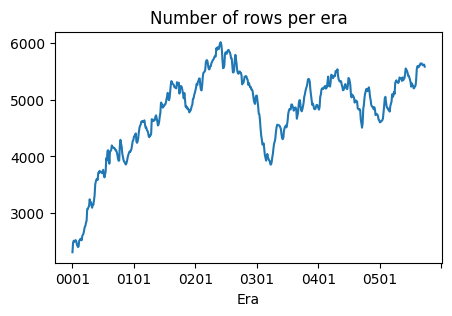

In [21]:
# Plot the number of rows per era
train.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

In [26]:
train = train.iloc[-100000:]

<Axes: title={'center': 'Number of rows per era'}, xlabel='Era'>

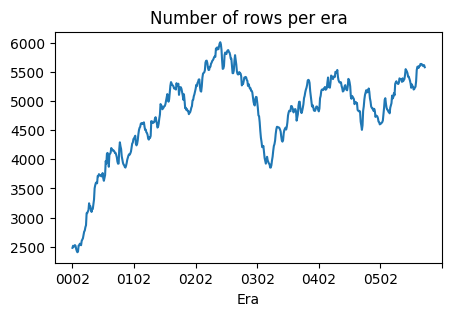

In [32]:
# Plot the number of rows per era
train.groupby("era").size().iloc[1:].plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

In [ ]:
from sklearn.decomposition import PCA
X = train.drop(columns=["era", "target"]).to_numpy()
pca = PCA()
X_pca = pca.fit_transform(X)

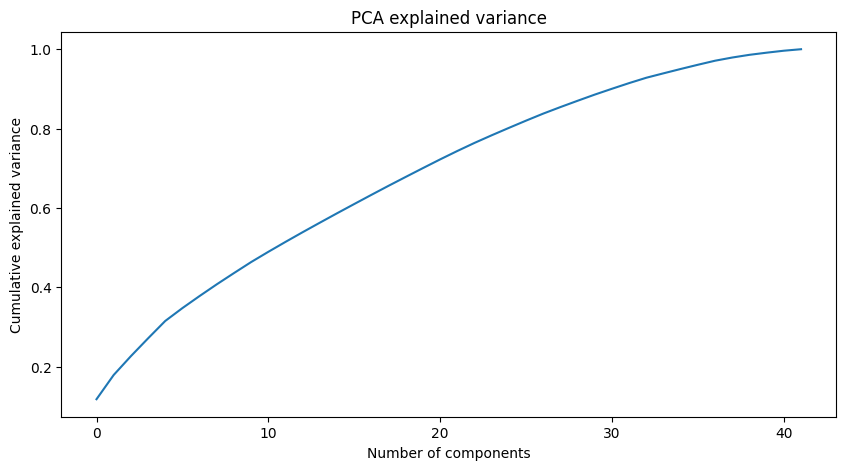

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cumsum = np.cumsum(pca.explained_variance_ratio_[:42])

plt.figure(figsize=(10, 5))
plt.plot(cumsum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA explained variance')
plt.show()
